In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")
plt.rc('font', family='Malgun Gothic')
pd.set_option('display.max_columns', None)

In [2]:
dataset = pd.read_excel("영화 데이터.xlsx")

In [3]:
dataset.shape

(40940, 18)

In [78]:
# 영화 개봉 후 발생하는 데이터 제거

df = dataset.drop(['순위', '매출액', '점유율', '관객수', '누적관객수', '스크린수', '상영횟수', '국적'], axis=1)

In [79]:
df.dtypes

영화명              object
개봉일      datetime64[ns]
누적매출액             int64
대표국적             object
제작사              object
배급사              object
등급               object
장르               object
감독               object
배우               object
dtype: object

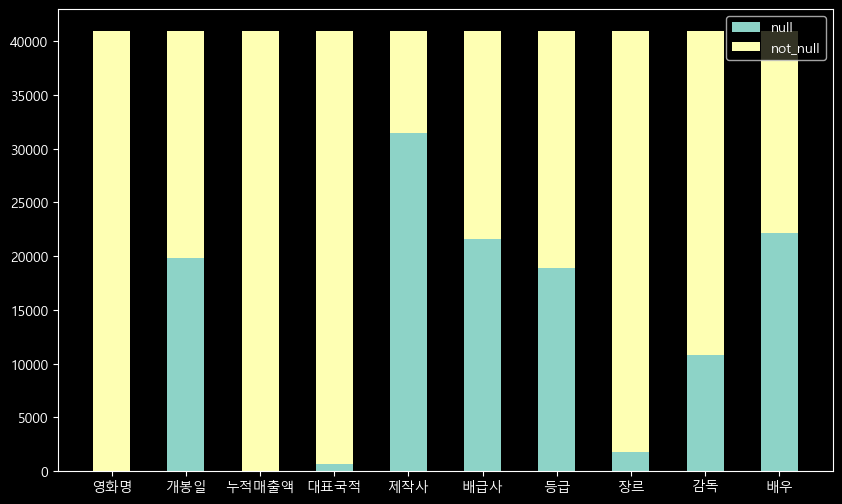

In [80]:
# 결측치 비교

null = df.isnull().sum()
not_null = df.notnull().sum()

plt.figure(figsize=(10, 6))
plt.bar(df.columns, null, label='null', width=0.5)
plt.bar(df.columns, not_null, label='not_null', width=0.5, bottom=null)
plt.legend()

In [81]:
# 제작사 결측치가 대부분이라서 삭제

df = df.drop(['제작사'], axis=1)

In [82]:
# 배우 5명까지 새로운 열로 추가하고 기존 배우 열 삭제

for i in range(1, 6):
    df[f'배우{i}'] = df['배우'].str.split(',').str[i - 1]

df = df.drop(['배우'], axis=1)

In [83]:
# 원-핫 인코딩, 장르를 더미변수로 생성하고 기존 장르 열 삭제

genre = df['장르'].str.get_dummies(sep=',')
df = pd.concat([df, genre], axis=1)
df = df.drop(['장르'], axis=1)

In [84]:
# 감독 1명만 남김

df['감독'] = df['감독'].str.split(',').str[0]

In [85]:
# 배급사 1개만 남김

df['배급사'] = df['배급사'].str.split(',').str[0]

In [86]:
# 관람 등급 1개만 남김

df['등급'] = df['등급'].str.split(',').str[0]

In [87]:
# 개봉일 결측치
df['개봉일'].fillna('1900-01-01', inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_12320\1379489020.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['개봉일'].fillna('1900-01-01', inplace=True)


In [88]:
df['년'] = df['개봉일'].dt.year
df['월'] = df['개봉일'].dt.month
df['일'] = df['개봉일'].dt.day
df['요일'] = df['개봉일'].dt.weekday    # 0 = 월요일 ~
df = df.drop(['개봉일'], axis=1)

In [103]:
# 누적매출액 없는 행 삭제
df.drop(df[df['누적매출액'] <= 0].index, inplace=True)

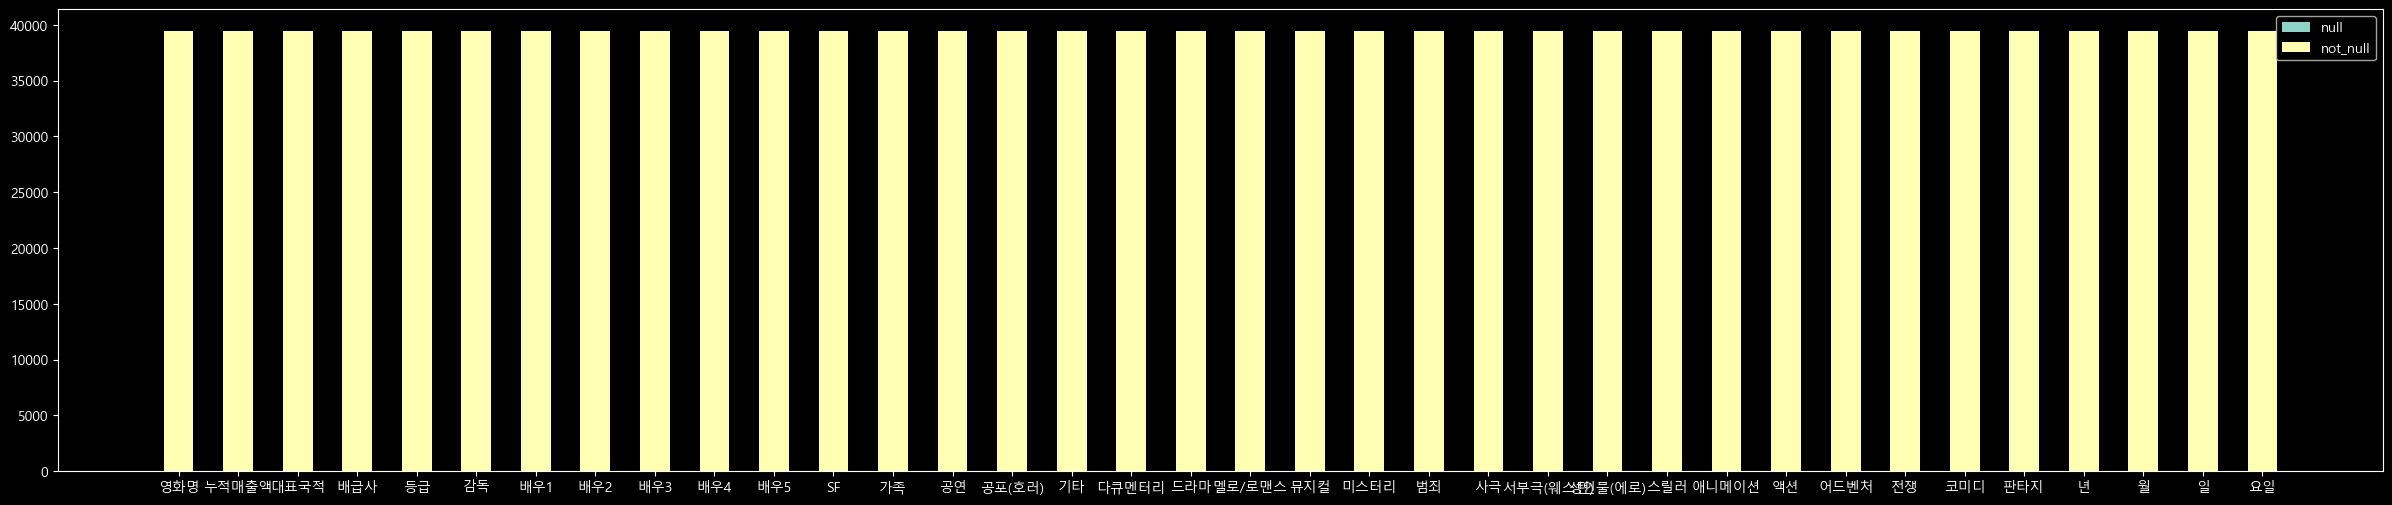

In [104]:
null = df.isnull().sum()
not_null = df.notnull().sum()

plt.figure(figsize=(30, 6))
plt.bar(df.columns, null, label='null', width=0.5)
plt.bar(df.columns, not_null, label='not_null', width=0.5, bottom=null)
plt.legend()

In [91]:
df.head(1)

,영화명,누적매출액,대표국적,배급사,등급,감독,배우1,배우2,배우3,배우4,배우5,SF,가족,공연,공포(호러),기타,다큐멘터리,드라마,멜로/로맨스,뮤지컬,미스터리,범죄,사극,서부극(웨스턴),성인물(에로),스릴러,애니메이션,액션,어드벤처,전쟁,코미디,판타지,년,월,일,요일
0,태극기 휘날리며,15687180500,한국,(주)다자인소프트,15세관람가,강제규,장동건,원빈,이은주,공형진,조원희,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2004,2,5,3


In [105]:
categories = df.columns[df.dtypes == "object"]
print(categories)

Index([], dtype='object')


In [106]:
# 카테고리 변수 수치형으로 변환
from sklearn.preprocessing import LabelEncoder

for cat in categories:
    le = LabelEncoder()

    df[cat].fillna("NaN", inplace=True)
    df[cat] = df[cat].astype(str)
    le = le.fit(df[cat])
    df[cat] = le.transform(df[cat])

In [107]:
df.head()

,영화명,누적매출액,대표국적,배급사,등급,감독,배우1,배우2,배우3,배우4,배우5,SF,가족,공연,공포(호러),기타,다큐멘터리,드라마,멜로/로맨스,뮤지컬,미스터리,범죄,사극,서부극(웨스턴),성인물(에로),스릴러,애니메이션,액션,어드벤처,전쟁,코미디,판타지,년,월,일,요일
0,28784,15687180500,78,39,4,139,4273,3432,2342,78,1495,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2004,2,5,3
1,29131,12777346000,20,537,4,3318,759,3338,1881,5,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2004,5,21,4
2,6754,11919939500,78,340,1,6013,4397,2425,537,177,1354,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2004,11,5,4
3,5024,11898748500,78,152,1,576,390,4018,3011,184,1597,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2004,9,17,4
4,29052,11658584500,20,558,1,1937,801,4271,2310,5,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2004,6,3,3


In [108]:
all_df = df.copy()

In [109]:
X = all_df.drop(["누적매출액"], axis=1) # 독립 변수
y = all_df["누적매출액"]                # 종속 변수

In [111]:
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

folds = 3
kf = KFold(n_splits=folds)

In [155]:
models = [] # fold 별로 작성한 모델을 저장
rmses = []
oof = np.zeros(len(X))  # 해당 데이터를 제외한 나머지 데이터를 이용하여 종속 변수를 예측한 값을 저장

lgbm_params = {
    "objective" : "regression",
    "random_seed" : 1234
}

for train_index, val_index in kf.split(X):

    X_train = X.iloc[train_index]
    X_valid = X.iloc[val_index]
    y_train = y.iloc[train_index]
    y_valid = y.iloc[val_index]

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
        
    model_lgb = lgb.train(lgbm_params,
                            lgb_train,
                            valid_sets=lgb_eval,
                            num_boost_round=100
                            )

    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    print(y_pred)
    # tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    tmp_rmse = mean_squared_error(y_valid, y_pred, squared=False) ** 0.5

    models.append(model_lgb)
    # rmses.append(tmp_rmse)
    oof[val_index] = y_pred

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2246
[LightGBM] [Info] Number of data points in the train set: 26285, number of used features: 35
[LightGBM] [Info] Start training from score 1118118578.355602
[9.51319757e+09 6.11477486e+09 5.85770363e+09 ... 3.52683501e+06
 7.53864767e+09 1.90060626e+08]
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2244
[LightGBM] [Info] Number of data points in the train set: 26285, number of used features: 35
[LightGBM] [Info] Start training from score 1227071863.031729
[ 5.06565091e+06 -1.41675972e+08 -1.63658776e+08 ...  5.06565091e+06
  1.20971589e+06  1.20971589e+06]
[LightGBM] [Info] Auto-choosing ro

<Axes: >

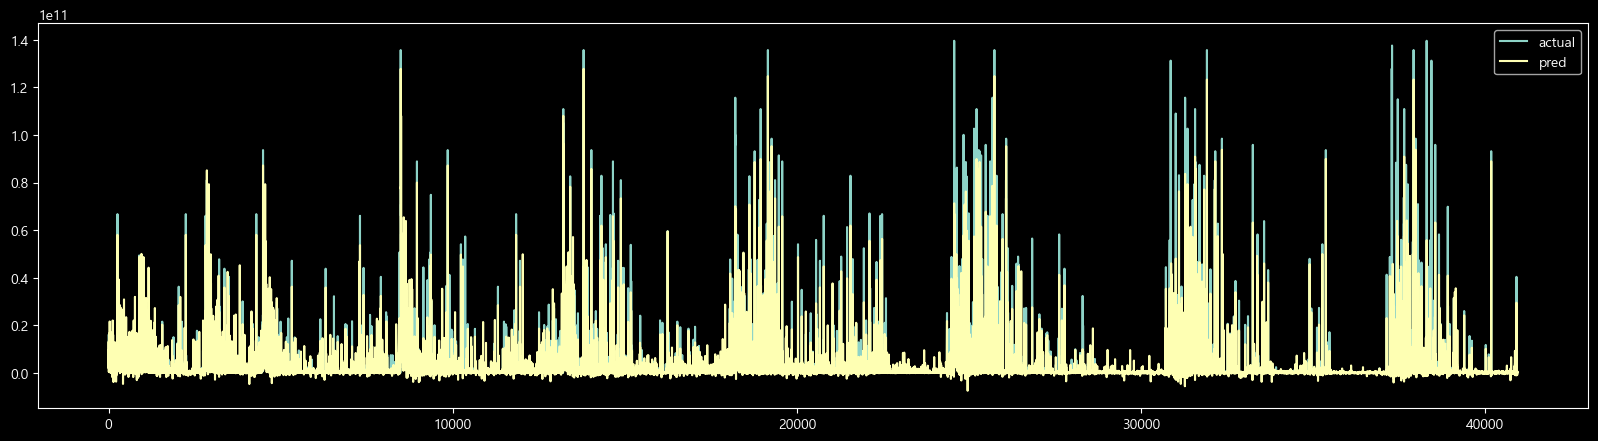

In [156]:
test = pd.DataFrame({
    "actual" : y,
    "pred": oof
})

test.plot(figsize=(20, 5))

In [157]:
np.mean(rmses)

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


nan